## Importing some libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
df=pd.read_csv('strokedata.csv')

In [ ]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

## Data Preprocessing

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [ ]:
df['bmi'].replace(np.nan,df['bmi'].mean(),inplace=True)

<ipython-input-75-0101dde297a0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].replace(np.nan,df['bmi'].mean(),inplace=True)


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


There are no null values present now , since we have replaced it with mean values

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


## Label Encoding

In [ ]:
for i in df.columns:
    if df[i].dtype=='object':
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i])

In [ ]:
df.dtypes

,0
id,int64
gender,int64
age,float64
hypertension,int64
heart_disease,int64
ever_married,int64
work_type,int64
Residence_type,int64
avg_glucose_level,float64
bmi,float64


In [ ]:
df.head(4)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1


## EDA

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df['gender'].value_counts()

,count
gender,
0,2994
1,2115
2,1


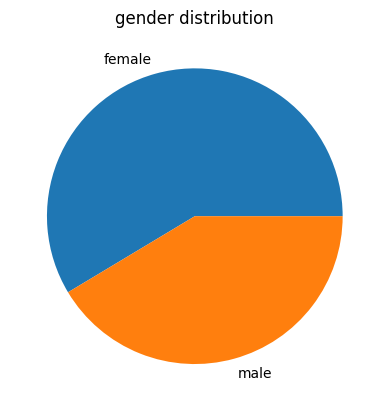

In [ ]:
temp=[2994,2115]
label=['female','male']
plt.pie(temp,labels=label)
plt.title("gender distribution")
plt.show()

In [ ]:
import seaborn as sns

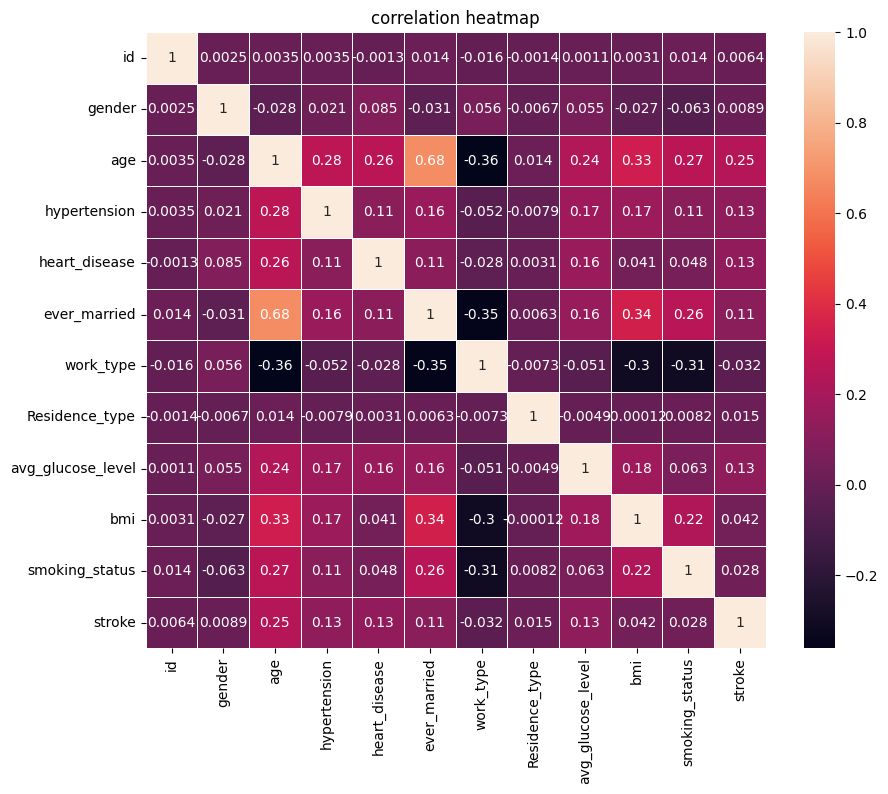

In [ ]:
coff_coeff=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(coff_coeff,annot=True,linewidths=0.5)
plt.title('correlation heatmap')
plt.show()

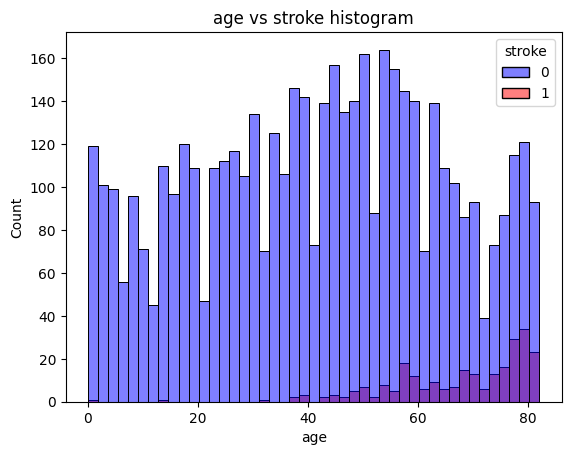

In [ ]:
sns.histplot(x='age',data=df,hue='stroke',bins=45,palette=['blue','red'])
plt.title('age vs stroke histogram')
plt.show()

## Over Sampling with SMOTE

In [ ]:
X=df.drop('stroke',axis=1)
y=df['stroke']
y=pd.DataFrame(y)

In [ ]:
y.value_counts()

,count
stroke,
0,4861
1,249


In [ ]:
smote =SMOTE(random_state=10)
X1,Y1=smote.fit_resample(X,y)

In [ ]:
Y1=pd.DataFrame(Y1)

In [ ]:
Y1.value_counts()


,count
stroke,
0,4861
1,4861


In [ ]:
X=df.drop('stroke',axis=1)
y=df['stroke']

In [ ]:
y=pd.DataFrame(y)

In [ ]:
y.value_counts()

,count
stroke,
0,4861
1,249


## Training and Testing dataset split

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X1,Y1,test_size=0.2,random_state=10)

## Decision Tree

In [ ]:
model1=DecisionTreeClassifier()


In [ ]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model1.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.900771208226221


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[880 118]
 [ 75 872]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       998
           1       0.88      0.92      0.90       947

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945



In [ ]:
import pickle as pkl
with open('model_stroke.pkl','wb') as f:
  pkl.dump(model1,f)

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.201.181.16


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.201.181.16:8501

y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://some-parents-accept.loca.lt
  Stopping...
^C
